[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


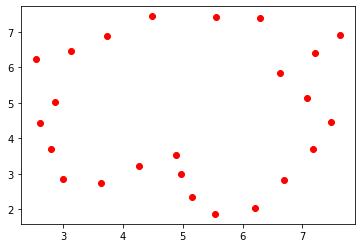

In [67]:
import random
from matplotlib import pyplot as plt 
from math import sqrt

# converting the input matrix into a 2d list
with open("TSP Matrix2.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


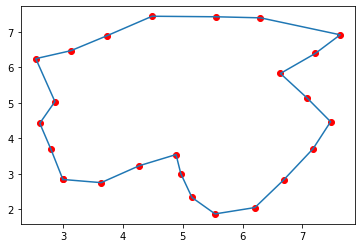

Initial Greedy Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10, 9]
Initial Greedy Path distance: 29.76280437263011


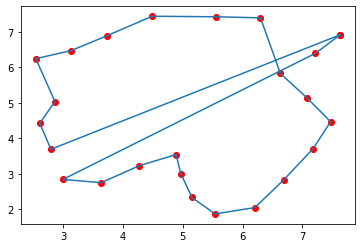

Initial Random Path: [9, 6, 13, 11, 4, 23, 2, 5, 20, 14, 17, 3, 1, 18, 8, 22, 12, 15, 19, 10, 16, 0, 7, 21]
Initial Random Path distance: 62.877835255311005


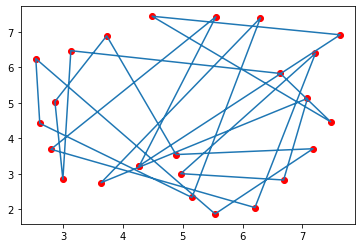

In [73]:
# function to calculate the distance between two cities
def calculate_hypotenuse(a, b):
    x1, y1 = cities[a]
    x2, y2 = cities[b]
    return sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(current, ind) < smallest:
                smallest = calculate_hypotenuse(current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.show()

optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, 0)
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(initial_random))
draw_path(cities, initial_random)

Initial distance =  62.877835255311005
Final distance =  43.87288140439351


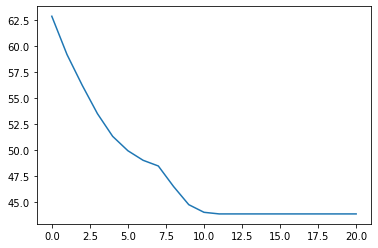

Initial distance =  29.76280437263011
Final distance =  29.666666294180164


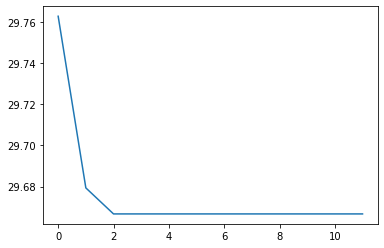

In [74]:
# function that chooses the steepest ascent amongst all right-neighbour swaps
def steepest_ascent(path):
    smallest = calculate_distance(path)
    temp_path = path
    for i in range(len(path)):
        p = list(path)
        temp = p[i]
        p[i] = p[(i+1)%len(p)]
        p[(i+1)%len(p)] = temp
        if calculate_distance(p) < smallest:
            smallest = calculate_distance(p)
            temp_path = p
    return temp_path

def run_steepest(path):
    p = list(path)
    print("Initial distance = ", calculate_distance(p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 10:
        current_distance = calculate_distance(p)
        dists.append(current_distance)
        new_p = steepest_ascent(p)
        if calculate_distance(new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_steepest(initial_random)
run_steepest(initial_greedy)

We can see that the Steepest Ascent Hill climbing algorithm very quickly finds a local optimal solution. However, that solution is final, and it doesn't improve beyond it in future iterations. 

Initial distance =  62.877835255311005
Final distance =  22.07732854502873


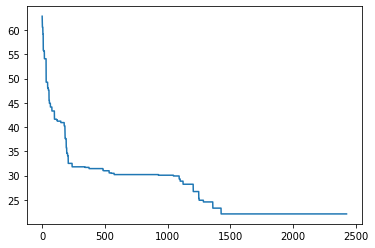

Initial distance =  29.76280437263011
Final distance =  28.180210295679665


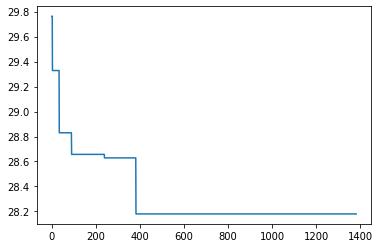

In [78]:
# function that swaps two random nodes
def hill_climbing_random(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def run_random(path):
    p = list(path)
    print("Initial distance = ", calculate_distance(p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1000:
        current_distance = calculate_distance(p)
        dists.append(current_distance)
        new_p = hill_climbing_random(p)
        if calculate_distance(new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_random(initial_random)
run_random(initial_greedy)

An algorithm that swaps two random nodes needs to run for more iterations, but doesn't get stuck as quickly, and thus achieves better solutions. Sometimes, as in the example above, the found solution is optimal (this doesn't happen every time!).